**Demo: SVM for MNIST Digit Recognition**
---
Load data

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In the Tensorflow dataset, the training and test data are represented as arrays:
 
  Xtr.shape = 60000 x 28 x 28
 
  Xts.shape = 10000 x 28 x 28

The test data consists of 60000 images of size 28 x 28 pixels; the test data consists of 10000 images.

In [2]:
import tensorflow as tf

(Xtr,ytr),(Xts,yts) = tf.keras.datasets.mnist.load_data()

print('Xtr shape: %s' % str(Xtr.shape))
print('Xts shape: %s' % str(Xts.shape))

ntr = Xtr.shape[0]
nts = Xts.shape[0]
nrow = Xtr.shape[1]
ncol = Xtr.shape[2]

Xtr shape: (60000, 28, 28)
Xts shape: (10000, 28, 28)


Each pixel value is from [0,255]. For this lab, it will be convenient to recale the value to -1 to 1 and reshape it as a ntr x npix and nts x npix.

In [3]:
npix = nrow*ncol
Xtr = 2*(Xtr/255 - 0.5)
Xtr = Xtr.reshape((ntr,npix)) #Convert the 2d array into a 1D array -> 28x28 pixel size to 784

Xts = 2*(Xts/255 - 0.5)
Xts = Xts.reshape((nts,npix))

Xtr.shape

(60000, 784)

**Plot Images**

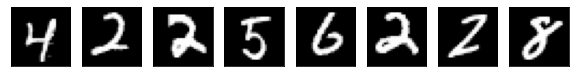

In [4]:
def plt_digit(ax, x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    ax.imshow(xsq,  cmap='Greys_r')
    ax.set_xticks([])
    ax.set_yticks([])

# Select random digits
nplt = 8
Iperm = np.random.permutation(ntr)

# Plot the images using the subplot command
fig, ax = plt.subplots(1,nplt,figsize=(10,3))
for i in range(nplt):
    ind = Iperm[i]
    plt_digit(ax[i], Xtr[ind,:])

**Trying a Logistic Regression Classifier**

To classify the digits, we will first use a logistic classifier. We select a small number of samples for training. Generally, you would use more training samples, but the optimizer is very slow.

In [5]:
ntr1 = 5000
Xtr1 = Xtr[Iperm[:ntr1],:]
ytr1 = ytr[Iperm[:ntr1]]

Now we run the optimizer. I have placed the verbose=10 option so that you can see the progress. It may not appear in the browser but in the command line where you launched jupyter notebook. This can take several minutes and will likely say that it ran out of iterations.

In [6]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(verbose=10, solver='lbfgs',\
                                         max_iter=500)
logreg.fit(Xtr1,ytr1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=10,
                   warm_start=False)

since it takes so long to run the optimizer, let's save the results in a file. You can use pickle module for this purpose.

In [7]:
import pickle

with open( "mnist_logreg.p", "wb" ) as fp:
    pickle.dump( [logreg, Xtr1, ytr1, Iperm],  fp)

we can recover the objects via the pickle.load command

In [8]:
with open( "mnist_logreg.p", "rb" ) as fp:
    logreg, Xtr1, ytr1, Iperm = pickle.load(fp)

 measure the accuracy on the test data

In [9]:
nts1 = 5000
Iperm_ts = np.random.permutation(nts) 
Xts1 = Xts[Iperm_ts[:nts1],:]
yts1 = yts[Iperm_ts[:nts1]]
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.891400


This is still a bad accuracy. Let's plot some of the errors.

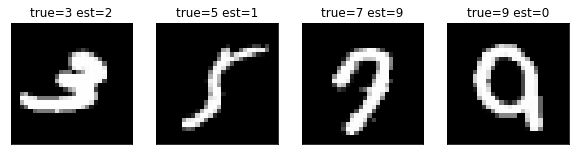

In [10]:
nplt = 4
Ierr = np.where(yts1 != yhat)[0]

fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):        
    ind = Ierr[i]    
    plt_digit(ax[i], Xts1[ind,:])        
    title = 'true={0:d} est={1:d}'.format(yts1[ind].astype(int), yhat[ind].astype(int))
    ax[i].set_title(title)

Obviously, some of these digits are very easy to classify for a human. We can get more fine-grained analysis of the digit errors by computing the confusion matrix.

[[0.939 0.    0.004 0.    0.004 0.025 0.011 0.004 0.006 0.01 ]
 [0.    0.968 0.004 0.006 0.    0.002 0.006 0.004 0.015 0.   ]
 [0.014 0.016 0.844 0.026 0.008 0.005 0.009 0.008 0.069 0.004]
 [0.008 0.    0.032 0.881 0.    0.036 0.002 0.017 0.029 0.006]
 [0.004 0.002 0.01  0.006 0.915 0.002 0.002 0.002 0.013 0.044]
 [0.012 0.002 0.002 0.043 0.006 0.833 0.015 0.01  0.042 0.016]
 [0.014 0.004 0.018 0.    0.014 0.023 0.919 0.002 0.002 0.002]
 [0.002 0.011 0.03  0.004 0.006 0.002 0.002 0.899 0.01  0.038]
 [0.01  0.007 0.02  0.017 0.012 0.05  0.011 0.008 0.846 0.018]
 [0.014 0.004 0.006 0.011 0.042 0.011 0.    0.036 0.019 0.855]]


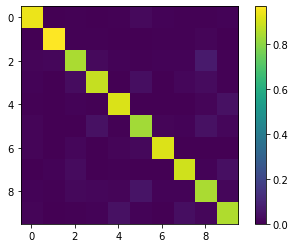

In [11]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(yts1,yhat)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

**Visualizing the Weights**

Plot weights 

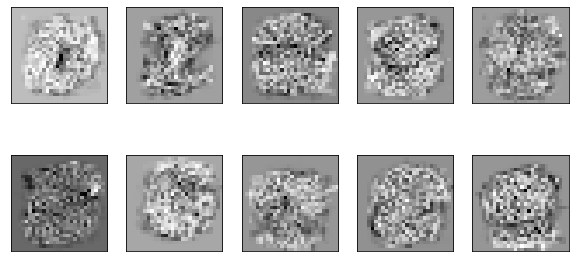

In [12]:
W = logreg.coef_
ndigit = W.shape[0]
fig, ax = plt.subplots(2,5,figsize=(10, 5))
for i in range(ndigit):
    irow = i // 5
    icol = i % 5
    plt_digit(ax[irow,icol], W[i,:])

What you see is that each weight is a very blurry version of the digit. The blurriness is due to the fact that weight must correlate with all shifts, rotations and other variations of the digits. As a result, the weights begin to correlate with other incorrect digits leading to poor performance.

To illustrate this problem more clearly, the code below does the following:



1.   Take nplot=8 random training digits with the label 2 and nplot=8 that are not the digit 2.
2.   Finds a weight w to the first of the digits with the label 2.
3.   Plots the all the digits x and their correlation with the weight z = w.dot(x)

We see that the correlation z is not consistently higher for the digits 2 instead of the non-digit 2. Therefore, if we try to use a linear classifier with this weight we would make a lot of errors.

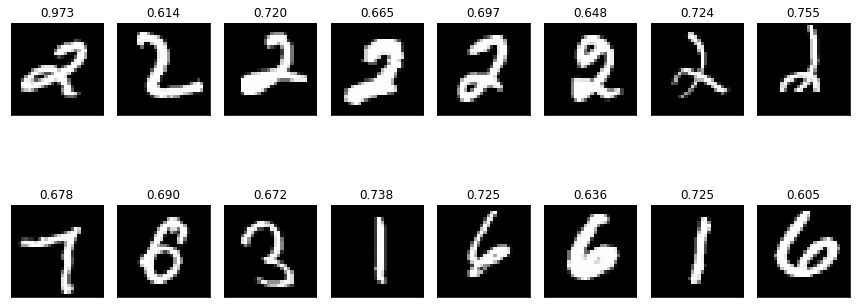

In [13]:
# Find digits with 2 and digits that are not 2
idig = 2
Idig   = np.where(ytr==idig)[0]
Inodig = np.where(ytr!=idig)[0]
n = len(Idig)
Idig = Idig[np.random.permutation(n)]
n = len(Inodig)
Inodig = Inodig[np.random.permutation(n)]

# Set the weight to the first digit
w = Xtr[Idig[0],:]
w = w / np.sum(np.abs(w))

# Find the correlation coefficient with the other digits 7
nplot = 8
fig, ax = plt.subplots(2,nplot,figsize=(12, 6))
rho = np.zeros(nplot)
for i in range(nplot):
    # Get a true and false digit
    j0 = Idig[i]
    j1 = Inodig[i]
    x0 = Xtr[j0,:]
    x1 = Xtr[j1,:]
    
    # Compute the correlations with the two digits
    rho0 = w.dot(x0)
    rho1 = w.dot(x1)
    
    plt_digit(ax[0,i], x0)    
    ax[0,i].set_title('%5.3f' % rho0)
    plt_digit(ax[1,i], x1)
    ax[1,i].set_title('%5.3f' % rho1)

plt.tight_layout()

**LINEAR KERNAL**

In [14]:
from sklearn import svm

# Create a classifier: a support vector classifier
# svc = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)
svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)

Next, we get the training and test data. The features are re-scaled to be between -1 and 1.

We fit the training data. Again, this will take several minutes.

In [15]:
ntr1 = 5000
nts1 = 5000
Xtr1 = Xtr[Iperm[:ntr1],:]
ytr1 = ytr[Iperm[:ntr1]]
Xts1 = Xts[Iperm_ts[:nts1],:]
yts1 = yts[Iperm_ts[:nts1]]

In [16]:
svc.fit(Xtr,ytr)

[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

Saving our result 

In [17]:
import pickle

with open("mnist_svc.p", "wb") as fp:
  pickle.dump([svc, Xtr1, ytr1], fp)

Reload the data 

In [18]:
# Can skip this step if you run the classifier directly
import pickle
with open( "mnist_svc.p", "rb" ) as fp:
    svc, Xtr1,ytr1 = pickle.load(fp)

Measuring the accuracy on the test data

In [19]:
yhat_ts = svc.predict(Xts1)

Save

In [20]:
with open("mnist_svc_test.p", "wb") as fp:
    pickle.dump([Xts1,yts1,yhat_ts], fp)

In [21]:
with open("mnist_svc_test.p", "rb") as fp:
    Xts1,yts1,yhat_ts = pickle.load(fp)

In [22]:
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.932800


**Support Vector**

In [ ]:
S = svc.support_vectors_
S.shape

In [ ]:
nplt = 4
nsv = S.shape[0]
Iperms = np.random.permutation(nsv)
fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):                
    ind = Iperms[i]
    plt_digit(ax[i], S[ind,:])

**Performance of SVM using RBF kernal**

In [ ]:
# Create a classifier: a support vector classifier
svcrbf = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)

In [ ]:
# Can skip this step if loading from previous result 
svcrbf.fit(Xtr1,ytr1)
import pickle
with open( "mnist_svcrbf.p", "wb" ) as fp:
    pickle.dump( [svcrbf, Xtr1, ytr1], fp)

In [ ]:
# Can skip if you run the previous cell
import pickle
with open( "mnist_svcrbf.p", "rb" ) as fp:
    svcrbf, Xtr1, ytr1 = pickle.load(fp)

Predict:

In [ ]:
yhat_ts = svcrbf.predict(Xts1)

with open("mnist_svcrbf_test.p", "wb") as fp:
    pickle.dump([yhat_ts,yts1,Xts1], fp)


with open("mnist_svcrbf_test.p", "rb") as fp:
    yhat_ts,yts1,Xts1 = pickle.load(fp)

acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

We see that the RBF kernel provides more accurate results. Now let us plot some errors


In [ ]:
Ierr = np.where((yhat_ts != yts1))[0]
nplt = 4
fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):             
    ind = Ierr[i]    
    plt_digit(ax[i], Xts1[ind,:])        
    title = 'true={0:d} est={1:d}'.format(yts1[ind].astype(int), yhat_ts[ind].astype(int))
    ax[i].set_title(title)

**Support vector**

In [ ]:
S = svcrbf.support_vectors_
S.shape

**Ploting some vectors**

In [ ]:
nplt = 4
nsv = S.shape[0]
Iperms = np.random.permutation(nsv)
fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):        
    ind = Iperms[i]
    plt_digit(ax[i], S[ind,:])

**HW -- Don't run this**
---


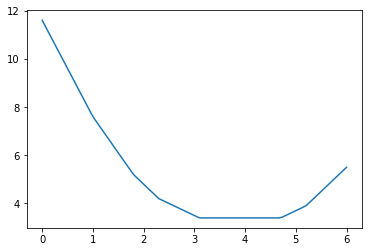

In [71]:
x = np.array([0,1.3,2.1,2.8,4.2,5.7]) 
y = np.array([-1, -1, -1, 1, -1, 1])
num = np.linspace(0,6,100)
J = np.zeros(len(num))
i = 0
min_val = np.zeros((len(num), len(num)))
for tval in num:
  z = x-tval
  Jt = np.sum(np.maximum(0,1-y*z))
  J[i] = Jt
  min_val[i, 0] = Jt;
  min_val[i, 1] = tval;
  i = i+1
plt.plot(tvals, J)


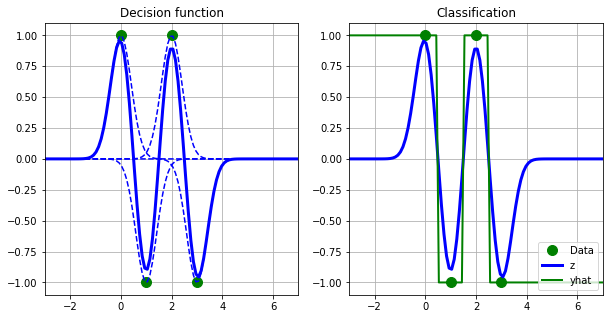

In [73]:
x1 = np.array([0,1,2,3])
y1 = np.array([1, -1, 1, -1])


nx = 100
x = np.linspace(-3,7,nx)
gam = 3

# Create the plots
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Plot the decision function 
ax[0].plot(x1, y1, 'go', ms=10)
z = np.zeros(nx)
for i, xi in enumerate(x1):
    keri = y1[i]*np.exp(-gam*(x-xi)**2)
    z = z + keri
    ax[0].plot(x,keri,'b--')
ax[0].plot(x,z,'b-', lw=3)

ax[0].set_xlim([-3,7])
ax[0].grid()
ax[0].set_title('Decision function')


# Plot the decision function and yhat
yhat = np.sign(z)
ax[1].plot(x1, y1, 'go', ms=10)
ax[1].plot(x,z,   'b-', lw=3)
ax[1].plot(x,yhat,'g-', lw=2)
ax[1].set_xlim([-3,7])
ax[1].grid()
ax[1].set_title('Classification')
ax[1].legend(['Data', 'z', 'yhat'], loc='lower right')

In [ ]:
fig, ax = plt.subplots(1,nplot,figsize=(10,3))
x1 = np.array([0,1,2,3])
y1 = np.array([1, -1, 1, -1])
a = np.array([0,0,1,1])
for i, gam in enumerate(gam_plot):
    # Fit the SVC
    svc = SVC(C=1,kernel='rbf', alpha = a, gamma=gam)
    svc.fit(x1[:,None],y1)
    
    # Compute decision function and yhat
    z = svc.decision_function(xp[:,None])
    yhat = np.sign(z)    
    
    # Plot
    ax[i].plot(xtr, ytr,'go')    
    ax[i].plot(xp, z, 'b-', lw=2)    
    ax[i].plot(xp, yhat, 'g-', lw=2)
    ax[i].grid()
    ax[i].set_xlabel('x')
    title = 'gamma = %5.1f' % gam
    ax[i].set_title(title)
    ax[i].set_xlim([-3,7])
    
fig.legend(['Data','z','yhat'], borderaxespad=0.1, loc='lower right',
           bbox_to_anchor=(0, 0.2, 1, 0.8))
plt.tight_layout()